How to install Keras in local: https://oindrilasen.com/2021/02/how-to-install-and-import-keras-in-anaconda-jupyter-notebooks/

In [1]:
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.preprocessing import image as kimage
import keras

import os
import re
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
vggModel = VGG16(weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [3]:
img_path = "../data/image_data"

In [4]:
# Get unordered list of images
file_lst = os.listdir(img_path)

In [5]:
# Order list of images in human sorting based on the first unique index in filename
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

file_lst.sort(key=natural_keys)

In [6]:
k = len(file_lst)
image = [0]*k
x = [0]*k
i=0
error_image = []
with tqdm(total=k) as pbar:
    for fileName in file_lst:
        pbar.update(1)
        try:
            image[i] = kimage.load_img(os.path.join(img_path, fileName), target_size=(300,300))
        except:
            image[i] = image[i-1]
            error_image.append(fileName)
        x[i] = kimage.img_to_array(image[i])
        x[i] = np.expand_dims(x[i], axis=0)
        # preprocess_input: The images are converted from RGB to BGR, then each color channel 
        # is zero-centered with respect to the ImageNet dataset, without scaling.
        x[i] = preprocess_input(x[i])
        i += 1
print(error_image)

100%|██████████| 2372/2372 [00:24<00:00, 95.83it/s] 

['448_BASIC V-NECK T-SHIRT_Black_Zara.png', '2381_T-shirt Stockholm Bike Pattern Charcoal_grey_Dedicated.png', '2615_LEA INNER CIRCLE - MAUVE_mauve_Zerum.png', '.DS_Store']


width300, height300


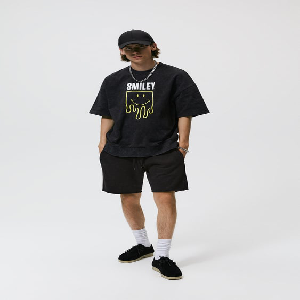

In [7]:
# Example of testing one random image
# Original image
w, h = image[0].size
print(f"width{w}, height{h}")
image[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


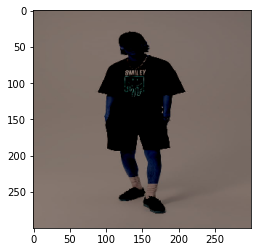

In [8]:
# The image below is preprocess, different from original image
t = x[0][0,:,:,:]
plt.imshow(t/255)

In [9]:
if os.path.isfile("similarity_deep.pkl"):
    with open('similarity_deep.pkl', 'rb') as openfile:
        similarity_deep = pickle.load(openfile)
else:
    prediction = [0]*k
    # got 41472 from ValueError message from prediction[i]
    # ValueError: could not broadcast input array from shape (41472) into shape (45000)
    matrix_res = np.zeros([k, 41472])
    with tqdm(total=k) as pbar:
        for i in range(k):
            pbar.update(1)
            prediction[i] = vggModel.predict(x[i]).ravel()
            matrix_res[i,:] = prediction[i]
    
    similarity_deep = matrix_res.dot(matrix_res.T)
    norms = np.array([np.sqrt(np.diagonal(similarity_deep))])
    similarity_deep = similarity_deep / norms / norms.T

  0%|          | 0/2372 [00:00<?, ?it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 508


100%|██████████| 2372/2372 [1:33:54<00:00,  2.38s/it]


In [10]:
similarity_deep.shape

(2372, 2372)

In [11]:
with open('similarity_deep.pkl', 'wb') as outp:
    pickle.dump(similarity_deep, outp)
with open('flatten_matrix.pkl', 'wb') as outp:
    pickle.dump(matrix_res, outp)
# with open('similarity_deep.pkl', 'rb') as openfile:
#     similarity_deep = pickle.load(openfile)

ERROR! Session/line number was not unique in database. History logging moved to new session 509


In [14]:
# k indicate top ?, tshirt_input indicates original input to similarity matrix
k=5
tshirt_input = 19
top5 = np.argsort(similarity_deep[tshirt_input,:])[:-k-1:-1]

In [15]:
# similarity score
print(similarity_deep[tshirt_input,top5])
# print image index
print(top5)

[1.         0.72204401 0.71838122 0.67449616 0.67199539]
[ 19 147 172  28 166]


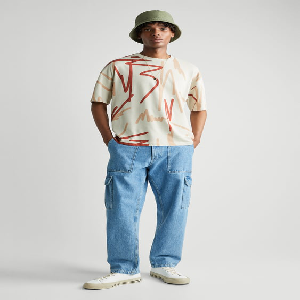

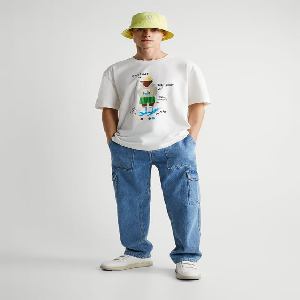

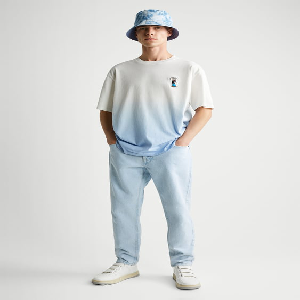

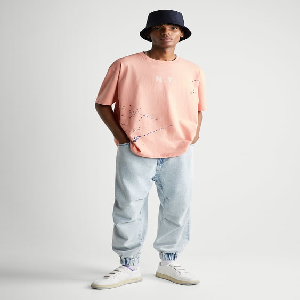

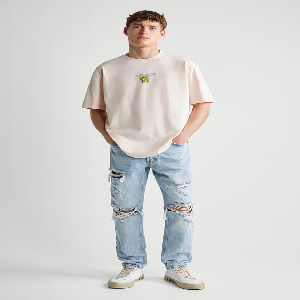

In [16]:
for idx in top5:
  display(image[idx])

In [ ]:
# find cosine similarity between two vectors:
# import scipy
# vector1 = [1,2,3]
# vector2 = [3,2,1]
# cosine_similarity = 1 - scipy.spatial.distance.cosine(vector1, vector2)
# cosine_similarity